In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

In [2]:
df = pd.read_csv(r"C:\Users\Choi\Desktop\data.csv")

In [3]:
df

,gender,age,height,weight,marital_status,education,income
0,0,30,158.635601,47.999269,not married,high,1
1,0,60,156.594756,45.777660,married,elementary,1
2,1,50,172.702880,62.653023,married,univ,1
3,0,50,154.178600,43.887703,married,high,2
4,1,40,178.385816,66.239314,married,middle,1
...,...,...,...,...,...,...,...
995,1,20,172.080854,62.937700,not married,univ,2
996,0,50,154.439923,44.427000,married,high,1
997,1,40,174.411255,66.633572,not married,high,2
998,1,30,174.381971,61.569472,not married,univ,2


In [4]:
def correlation(df):
    
    df2 = df.select_dtypes(exclude="object")
    df3 = df2.dropna()
    df4 = pd.DataFrame(columns=df2.columns,index=df2.columns)
    
    val = df2.columns.to_list()
    
    for i in val:
          
 

        for j in val:
        
            if df2[i].isnull().sum() > 0 or df2[j].isnull().sum() >0:
            
                cov = (df3[i]*df3[j]).mean() - df3[i].mean()*df3[j].mean()
            
                std1 = math.sqrt((df3[i]**2).mean() - (df3[i].mean())**2)
                std2 = math.sqrt((df3[j]**2).mean() - (df3[j].mean())**2)
            
                df4.loc[i,j] = cov / (std1*std2)
        
            else:
            
                cov = (df2[i]*df2[j]).mean() - df2[i].mean()*df2[j].mean()
                std1 = math.sqrt((df2[i]**2).mean() - (df2[i].mean())**2)
                std2 = math.sqrt((df2[j]**2).mean() - (df2[j].mean())**2)
            
                df4.loc[i,j] = cov / (std1*std2)
                
    return df4

In [5]:
correlation(df)

,gender,age,height,weight,income
gender,1,0.013108,0.703123,0.898438,0.0169897
age,0.013108,1,-0.0120239,-0.0506826,-0.0164082
height,0.703123,-0.0120239,1,0.772103,-0.00552029
weight,0.898438,-0.0506826,0.772103,1,0.000981571
income,0.0169897,-0.0164082,-0.00552029,0.000981571,1


In [6]:
df2 = df.dropna()

# Problem 3

## (a)

In [7]:
np1 = []
for i in range(10,2005,5):
    np1.append([i,np.random.choice(df2.weight,size=i).mean()])
np1_pd = pd.DataFrame(np1,columns=["sample_size","mean"])

Text(0, 0.5, 'Mean')

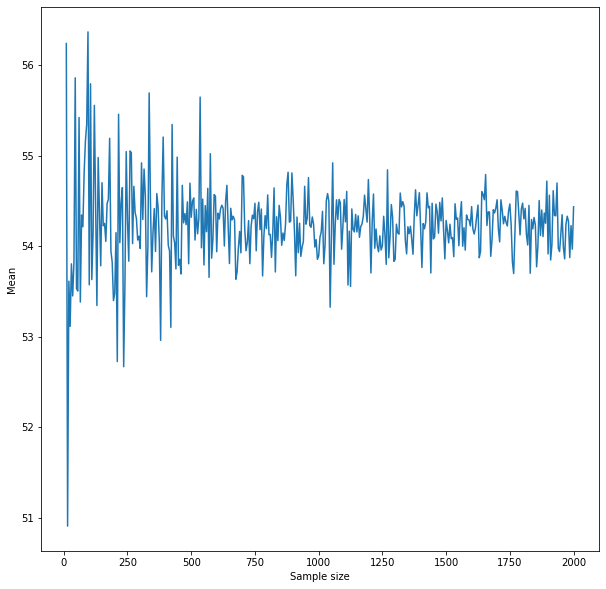

In [8]:
plt.figure(figsize=(10,10))
plt.plot("sample_size","mean",data=np1_pd)
plt.xlabel("Sample size")
plt.ylabel("Mean")

### When we increase sample size, it converge to 54~55. We know that when we increase sample size, sample mean follows population mean. We can check this through plot that we draw. 

## (b)

In [9]:
np1 = []
np2 = []
np3 = []

for i in range(1000):
    
    np1.append((np.random.choice(df2.weight,size=5)).mean())
    np2.append((np.random.choice(df2.weight,size=10)).mean())
    np3.append((np.random.choice(df2.weight,size=100)).mean())
    
    

Text(0.5, 1.0, 'Mean of sample size 100')

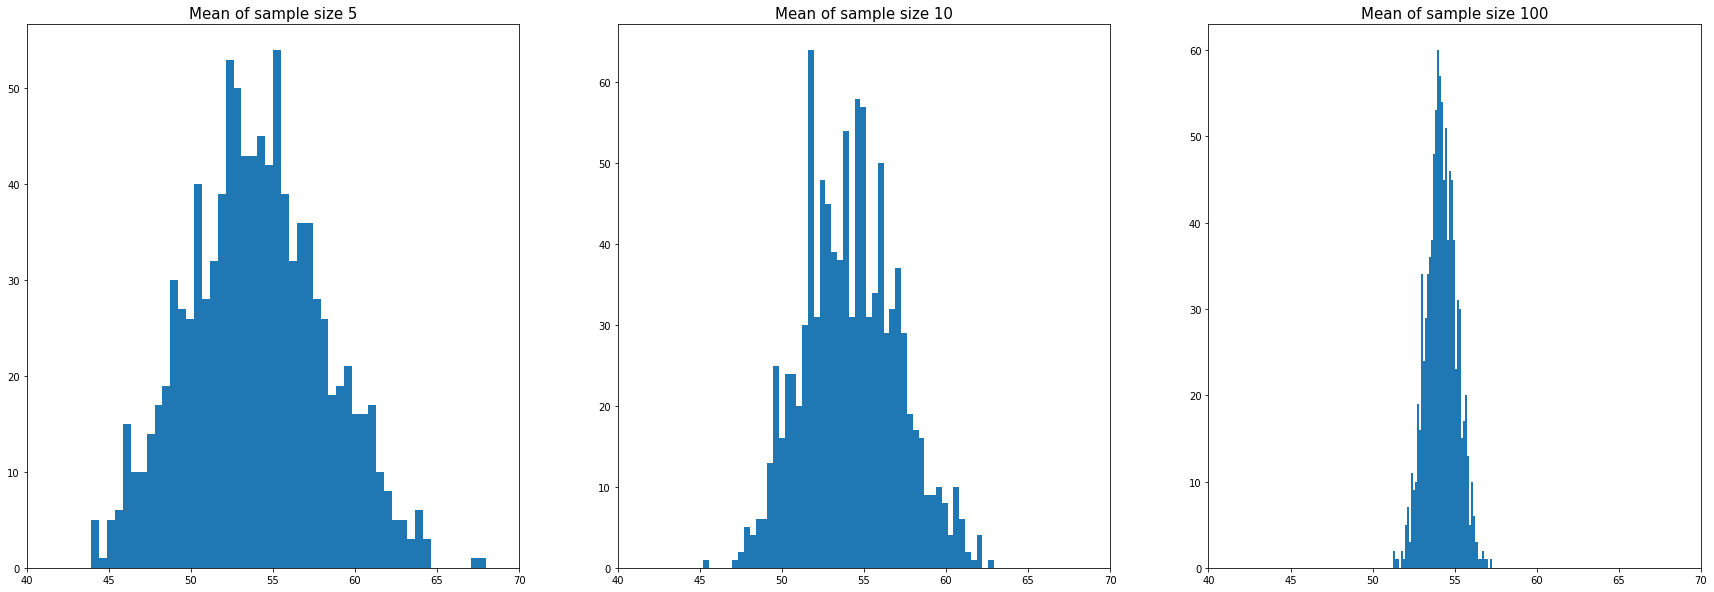

In [10]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].hist(np1,bins=50)
ax[0].set_xlim(40,70)
ax[0].set_title("Mean of sample size 5",fontsize=15)
ax[1].hist(np2,bins=50)
ax[1].set_xlim(40,70)
ax[1].set_title("Mean of sample size 10",fontsize=15)
ax[2].hist(np3,bins=50)
ax[2].set_xlim(40,70)
ax[2].set_title("Mean of sample size 100",fontsize=15)

Text(0.5, 1.0, 'Histogram of population')

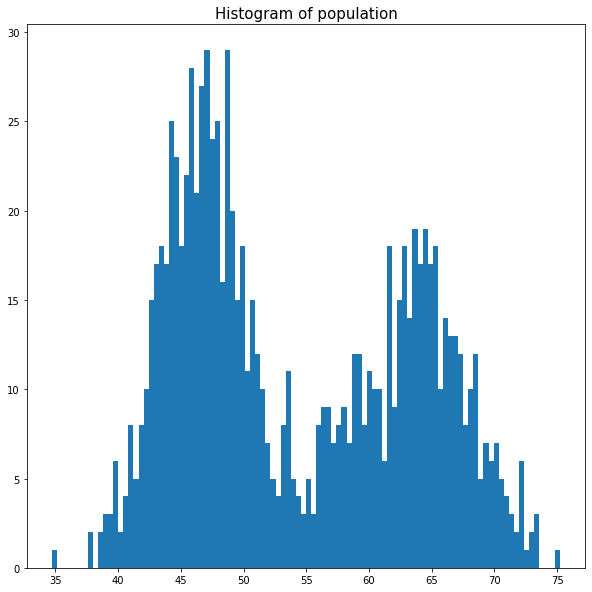

In [11]:
plt.figure(figsize=(10,10))
plt.hist(df2.weight,bins=100)
plt.title("Histogram of population",fontsize=15)

Text(0.5, 1.0, 'Mean of sample size 100')

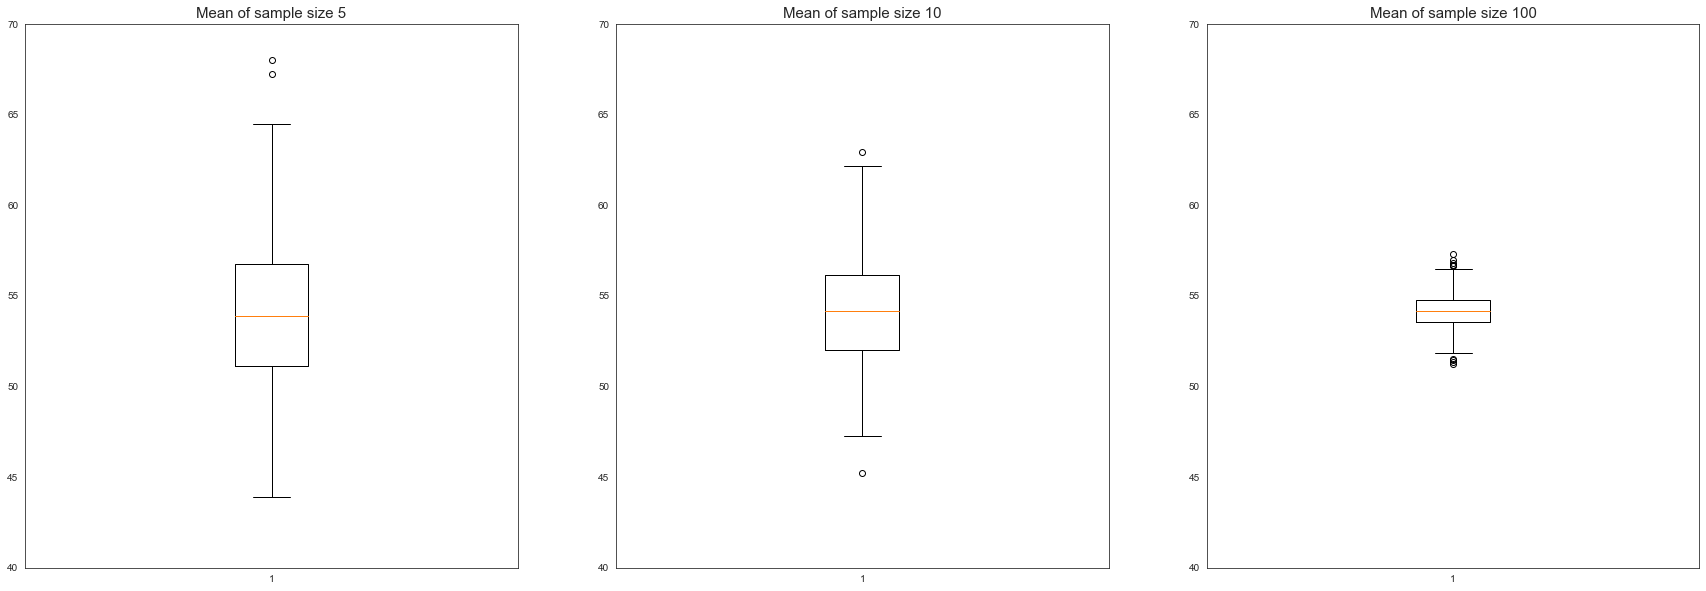

In [12]:
sns.set_style("white")
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(30,10))

ax[0].boxplot(np1)
ax[0].set_ylim(40,70)
ax[0].set_title("Mean of sample size 5",fontsize=15)
ax[1].boxplot(np2)
ax[1].set_ylim(40,70)
ax[1].set_title("Mean of sample size 10",fontsize=15)
ax[2].boxplot(np3)
ax[2].set_ylim(40,70)
ax[2].set_title("Mean of sample size 100",fontsize=15)

### First when we see popluation distribution, there is two cluster. One is low and the other one is high. It is because usually male weight is higher than femal weight. Both cluster is close to normal distribution and when we see the male weight, its mean is about 65 and female weight mean is about 46. Population mean will be value that is located in center of population distribution. And we can know that population mean is about 54~56 by population histogram.

### We can know that when sample size increased, mean values converge more to 54. Also when we increase sample size, IQR decreased and outlier becomes much closer to median. 

### When we see the population histogram, we can know that it is 54~56, and sample mean converge to 54 when we increase sample size. It is true that when we increase sample size, sample mean converge to population mean. 

## (C)

In [13]:
np.quantile(df2.weight,[0.2,0.4,0.6,0.8])

array([45.52991531, 48.76524267, 57.4463014 , 64.26698104])

### Sample that has mean 55.2 has high probability that is from popluation. When we see the distribution of sample size 10, we can know that mean is 55. And in this case, sample mean is 55.2 so it is proper to think that this sample is come from population.
### Also when we check quantile of population, we can know that sample mean of 55.2 is between Q2 and Q3 of population. Sample is likely to be came from population